In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player  Nation    Pos  \
0              0     Theo Hernández  fr FRA     DF   
1              1    Marcel Sabitzer  at AUT     MF   
2              2   Dejan Kulusevski  se SWE  MF,FW   
3              3      Julian Brandt  de GER  FW,MF   
4              4  Nikola Milenković  rs SRB     DF   
...          ...                ...     ...    ...   
1507        2504   Souleymane Touré  fr FRA     DF   
1508        2506        Jere Uronen  fi FIN     DF   
1509        2507         Yan Valery  tn TUN     DF   
1510        2513            Vitinha  pt POR     MF   
1511        2518  Alessandro Zanoli  it ITA     DF   

                                                  Squad  \
0                                                 Milan   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                           Juventus+Tottenham+Juventus   
3                                              Dortmund   
4                                            Fiorentina   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                Comp   Age    Born     MP  \
0                                         it Serie A  25.0  1997.0   97.0   
1     de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2           it Serie A+eng Premier League+it Serie A  23.0  2000.0  103.0   
3                                      de Bundesliga  27.0  1996.0   94.0   
4                                         it Serie A  25.0  1997.0   95.0   
...                                              ...   ...     ...    ...   
1507                                      fr Ligue 1  19.0  2003.0   24.0   
1508                        fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                   eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                      fr Ligue 1  22.0  2000.0   50.0   
1511                                      it Serie A  21.0  2000.0   23.0   

      Starts      Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       95.0     8415  93.5         0.17       0.31        0.15          0.29   
1       46.0    53186  47.1         0.21       0.34        0.13          0.25   
2       61.0  1265762  67.0         0.18       0.49        0.18          0.49   
3       68.0     5970  66.3         0.32       0.59        0.32          0.59   
4       91.0     8097  89.9         0.07       0.09        0.07          0.09   
...      ...      ...   ...          ...        ...         ...           ...   
1507    18.0     1656  18.4         0.05       0.05        0.05          0.05   
1508    12.0      976  10.8         0.00       0.09        0.00          0.09   
1509    31.0     2542  28.2         0.00       0.00        0.00          0.00   
1510    34.0     2910  32.4         0.12       0.22        0.12          0.22   
1511    16.0     1552  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.13          0.28        0.11            0.26               272.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.15          0.36        0.15            0.36               260.0   
3         0.18          0.43        0.18            0.43               185.0   
4         0.09          0.10        0.09            0.10                13.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509      0.03          0.07  

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and miMFielders (MF) from the 'final_player' DataFrame
defense_players = final_player[final_player['Pos'].isin(['MF'])]
newbie = newbie[newbie['Pos'].isin(['MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

# Reset the index if needed
defense_players = defense_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
Zielinski=player_2023[player_2023['Player']=='Piotr Zieliński']
Zielinski

Unnamed: 0           Player  Nation Pos   Squad        Comp  Age  Born  \
310        2868  Piotr Zieliński  pl POL  MF  Napoli  it Serie A   28  1994   

     MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
310  37      27  2287  25.4         0.12       0.43        0.12          0.43   

     xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
310      0.14          0.43        0.14            0.43                58.0   

     Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
310           22.0            37.9              29.0               50.0   

     Touches_per_90  Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  \
310           69.09                    0.75                     7.2   

     Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
310                   32.36                   30.12                    2.13   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
310                      69.09                       2.28   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
310                  0.87                     1.14           42.76   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
310                  211.5                                97.83   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
310                        2.44                2.95   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
310                         0.35                1.06                 0.59   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
310                   53.58                                5.08   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
310                        5.31                     0.47   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
310                   3.35                   1.46                  0.16   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
310              0.12                     0.24                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
310                   0.31                   0.12                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
310              0.04                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
310            1300.0            1552.0               83.8         18650.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
310          5534.0             767.0             833.0               92.1   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
310              359.0              423.0                84.9   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
310             95.0            168.0              56.5             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
310        0.29        0.3          0.02               3.31   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
310                4.8                        1.77   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
310                         0.28                       5.04   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
310                     61.1                    54.37   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
310                     6.57                     1.61                  0.08   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
310             0.24            4.41                    0.16   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
310                 3.62                    1.18                     1.42   

     Str_Corner_Kicks_per_90  Passes_

In [6]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of zielinski's stats from the percentile ranks DataFrame
zielinski_percentile_ranks = round(players_percentile_ranks.iloc[[310]],0)

# Print the percentile ranks for zielinski
zielinski_percentile_ranks


Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
310         67.0       94.0        72.0          95.0      78.0          95.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
310        84.0            97.0                85.0           70.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
310            17.0              91.0               85.0            77.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
310                     5.0                     9.0                    46.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
310                    99.0                    80.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
310                       77.0                       78.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
310                  63.0                     90.0            73.0   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
310                   69.0                                 67.0   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
310                        88.0                97.0   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
310                         82.0                36.0                 28.0   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
310                    87.0                                93.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
310                        92.0                     84.0   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
310                   98.0                   97.0                  81.0   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
310              62.0                     93.0                   18.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
310                   85.0                   95.0                  41.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
310              85.0                     39.0                   44.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
310              80.0              79.0               65.0            69.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
310            69.0              91.0              91.0               87.0   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
310               56.0               57.0                40.0   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
310             61.0             69.0              28.0            47.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
310       100.0      100.0          70.0              100.0   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
310               66.0                        97.0   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
310                         85.0                       54.0   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
310                     81.0                     74.0   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
310                     92.0                     66.0                  29.0   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
310             33.0            90.0                    44.0   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
310                 97.0                    90.0                     95.0   

     Str_Corner_Kicks_per_90  Passes_Cmp_per_90  Passes_Off_per_90  \
310                     94.0               80.0               46.0   

     Passes_Blocked_per_90  Shots_total_per90  Shots_on_target_per90  \
310                   62.0     

In [7]:
# Extract the percentile ranks, transpose, and sort them in descending order
zielinski_percentile_ranks_percentile_ranks_sorted = zielinski_percentile_ranks.T.sort_values(by=310, ascending=False)

# Get the top 20 parameters
top_20_params = zielinski_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = zielinski_percentile_ranks_percentile_ranks_sorted[310].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['xAG_per_90', 'xA_per_90', 'Key_Passes_per_90',
       'Touches_Att_3rd_per_90', 'Pass_Live_Shot_per_90',
       'Pass_Dead_Shot_per_90', '1/3_Carries_per_90', 'Corner_Kicks_per_90',
       'npxG+xAG_per90', 'Passes_Penalty_Area_per_90', 'Pass_Dead_Goal_per_90',
       'xG+xAG_per90', 'G+A-PK_per90', 'Out_Corner_Kicks_per_90',
       'Str_Corner_Kicks_per_90', 'G+A_per90', 'Fouls_drawn_Shot_per_90',
       'Progressive_Passes_Received_per_90', 'Dead_Ball_Passes_per_90',
       'Shot_Creating_Action_per90', 'Passes_Short_Cmp', 'Passes_Short_Att',
       'Tackled_Take_Ons', 'Crosses_per_90', 'Tackled_Take_Ons_per_90',
       'In_Corner_Kicks_per_90', 'Shots_on_target_per90',
       'Progressive_Carries_per_90', 'Passes_Short_Cmp%',
       'Passes_Received_per_90'],
      dtype='object')
Values:
xAG_per_90                            100.0
xA_per_90                             100.0
Key_Passes_per_90                     100.0
Touches_Att_3rd_per_90                

In [8]:
import pandas as pd








params=['Goals_per90', 'Passes_1/3_per_90',  'Goal_Creating_Action_90',
        'xG_per90','Shots_on_target_per90', 'G+A_per90',
        'xA_per_90','1/3_Carries_per_90', 'Shot_Creating_Action_per90',
        'Passes_Penalty_Area_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
zielinski_percentile_ranks = round(players_percentile_ranks.iloc[[310]],0)

# Print the percentile ranks for Declan Rice
zielinski_percentile_ranks


Goals_per90  Passes_1/3_per_90  Goal_Creating_Action_90  xG_per90  \
310         67.0               66.0                     84.0      78.0   

     Shots_on_target_per90  G+A_per90  xA_per_90  1/3_Carries_per_90  \
310                   89.0       94.0      100.0                97.0   

     Shot_Creating_Action_per90  Passes_Penalty_Area_per_90  \
310                        92.0                        97.0   

     Progressive_Carries_per_90  Shot_Creating_Action_per90  \
310                        88.0                        92.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Key_Passes_per_90  
310                    99.0                    80.0              100.0

In [9]:
zielinski_percentile_ranks_list = zielinski_percentile_ranks.values.flatten().tolist()

zielinski_percentile_ranks_list

[67.0,
 66.0,
 84.0,
 78.0,
 89.0,
 94.0,
 100.0,
 97.0,
 92.0,
 97.0,
 88.0,
 92.0,
 99.0,
 80.0,
 100.0]

In [10]:
image_path = "Zielinski.jpg"
fdj_cropped = Image.open(image_path)


In [11]:
params=['Goals_per90', 'Passes_Final_Third_per_90',  'Goal_Creating_Action_per90',
        'xG_per90','Shots_on_target_per90', 'Goals+Assists_per90',
        'Expected_Assists_per_90','Final_Third_Carries_per_90', 'Shot_Creating_Action_per90',
        'Passes_Penalty_Area_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Attempted_Final_Third_per_90', 'Touches_Attempted_Penalty_Area_per_90','Key_Passes_per_90']



split_params = [param.replace('_', '\n') for param in params]

In [12]:
params=['Goals_per90', 'Passes_1/3_per_90',  'Goal_Creating_Action_90',
        'xG_per90','Shots_on_target_per90', 'G+A_per90',
        'xA_per_90','1/3_Carries_per_90', 'Shot_Creating_Action_per90',
        'Passes_Penalty_Area_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90','Key_Passes_per_90']

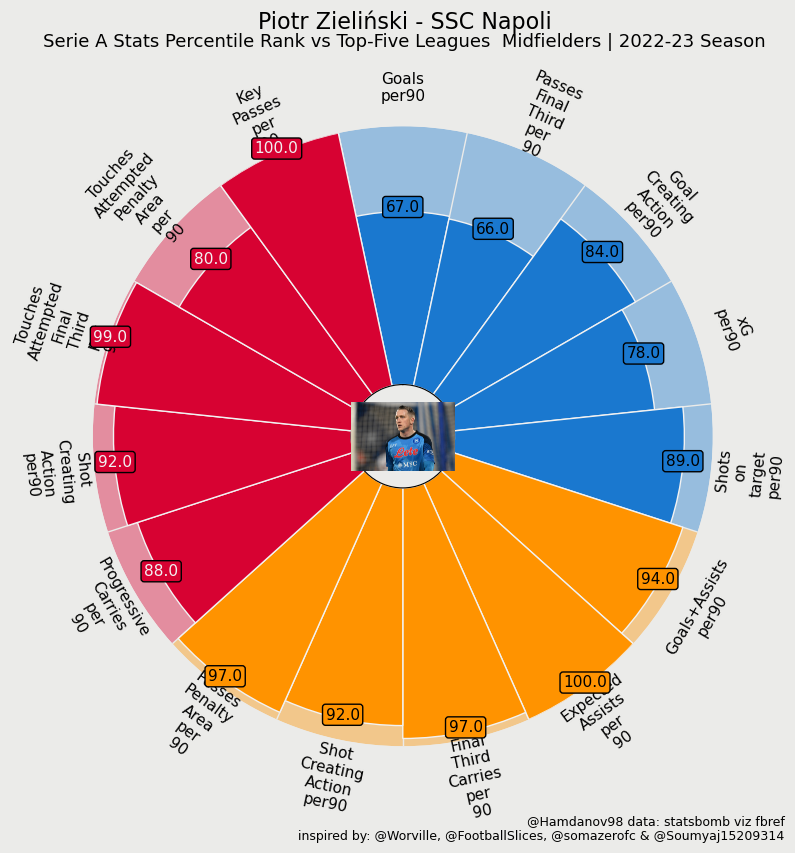

In [13]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    zielinski_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Piotr Zieliński - SSC Napoli", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues  Midfielders | 2022-23 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Zielinski_2023_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [14]:
player_2024 = player_2024[player_2024['Player'] != 'Piotr Zieliński']
player_2024


Unnamed: 0                      Player   Nation Pos  \
0             5           Salis Abdul Samed   gh GHA  MF   
1             7             Laurent Abergel   fr FRA  MF   
2            28                 Yacine Adli   fr FRA  MF   
3            31            Michel Aebischer   ch SUI  MF   
4            62                Luis Alberto   es ESP  MF   
5            66               Rubén Alcaraz   es ESP  MF   
6            68                  Iván Alejo   es ESP  MF   
7            69                Carles Aleñá   es ESP  MF   
8            85               Edson Álvarez   mx MEX  MF   
9           108              Benjamin André   fr FRA  MF   
10          126            Oliver Arblaster  eng ENG  MF   
11          139           Maximilian Arnold   de GER  MF   
12          167             Neil El Aynaoui   fr FRA  MF   
13          173                Iddrisu Baba   gh GHA  MF   
14          178                Milan Badelj   hr CRO  MF   
15          189            Tiemoué Bakayoko   fr FRA  MF   
16          217              Nicolò Barella   it ITA  MF   
17          219                Ross Barkley  eng ENG  MF   
18          222    Leandro Barreiro Martins   lu LUX  MF   
19          223            Enzo Barrenechea   ar ARG  MF   
20          225               Pablo Barrios   es ESP  MF   
21          231                  Toma Bašić   hr CRO  MF   
22          265             Jude Bellingham  eng ENG  MF   
23          269                Fran Beltrán   es ESP  MF   
24          274            Carlos Benavídez   uy URU  MF   
25          275             Ismaël Bennacer   dz ALG  MF   
26          279              Nabil Bentaleb   dz ALG  MF   
27          280           Rodrigo Bentancur   uy URU  MF   
28          288                Sander Berge   no NOR  MF   
29          308              Philip Billing   dk DEN  MF   
30          313               Yves Bissouma   ml MLI  MF   
31          314        Leonardo Bittencourt   de GER  MF   
32          316              Antonio Blanco   es ESP  MF   
33          321                 Alexis Blin   fr FRA  MF   
34          333               Daniel Boloca   ro ROU  MF   
35          335         Giacomo Bonaventura   it ITA  MF   
36          337                Warren Bondo   fr FRA  MF   
37          357             Hicham Boudaoui   dz ALG  MF   
38          363                Edoardo Bove   it ITA  MF   
39          384           Marco Brescianini   it ITA  MF   
40          396              Josh Brownhill  eng ENG  MF   
41          422              Moisés Caicedo   ec ECU  MF   
42          423                 Tom Cairney  sct SCO  MF   
43          424                Jens Cajuste   se SWE  MF   
44          430            Hakan Çalhanoğlu   tr TUR  MF   
45          433               Lamine Camara   sn SEN  MF   
46          434                Mahdi Camara   fr FRA  MF   
47          435              Mohamed Camara   ml MLI  MF   
48          452              Étienne Capoue   fr FRA  MF   
49          456            Maxence Caqueret   fr FRA  MF   
50          464              Johnny Cardoso   us USA  MF   
51          484       Cristian Cásseres Jr.   ve VEN  MF   
52          493              Danilo Cataldi   it ITA  MF   
53          528            Pedro Chirivella   es ESP  MF   
54          531               Joris Chotard   fr FRA  MF   
55          535               Ryan Christie  sct SCO  MF   
56          539                  Pathé Ciss   sn SEN  MF   
57          547                Jordan Clark  eng ENG  MF   
58          563              Santi Comesaña   es ESP  MF   
59          569                  Lewis Cook  eng ENG  MF   
60          572            Francis Coquelin   fr FRA  MF   
61          585      David Pereira da Costa   pt POR  MF   
62          589                  Samu Costa   pt POR  MF   
63          593           Lassana Coulibaly   ml MLI  MF   
64          615                 Josh Cullen   ie IRL  MF   
65          632                      Danilo  

In [15]:
player_2024=pd.concat([player_2024,Zielinski])
player_2024=player_2024.reset_index(drop=True)
player_2024

Unnamed: 0                      Player   Nation Pos  \
0             5           Salis Abdul Samed   gh GHA  MF   
1             7             Laurent Abergel   fr FRA  MF   
2            28                 Yacine Adli   fr FRA  MF   
3            31            Michel Aebischer   ch SUI  MF   
4            62                Luis Alberto   es ESP  MF   
5            66               Rubén Alcaraz   es ESP  MF   
6            68                  Iván Alejo   es ESP  MF   
7            69                Carles Aleñá   es ESP  MF   
8            85               Edson Álvarez   mx MEX  MF   
9           108              Benjamin André   fr FRA  MF   
10          126            Oliver Arblaster  eng ENG  MF   
11          139           Maximilian Arnold   de GER  MF   
12          167             Neil El Aynaoui   fr FRA  MF   
13          173                Iddrisu Baba   gh GHA  MF   
14          178                Milan Badelj   hr CRO  MF   
15          189            Tiemoué Bakayoko   fr FRA  MF   
16          217              Nicolò Barella   it ITA  MF   
17          219                Ross Barkley  eng ENG  MF   
18          222    Leandro Barreiro Martins   lu LUX  MF   
19          223            Enzo Barrenechea   ar ARG  MF   
20          225               Pablo Barrios   es ESP  MF   
21          231                  Toma Bašić   hr CRO  MF   
22          265             Jude Bellingham  eng ENG  MF   
23          269                Fran Beltrán   es ESP  MF   
24          274            Carlos Benavídez   uy URU  MF   
25          275             Ismaël Bennacer   dz ALG  MF   
26          279              Nabil Bentaleb   dz ALG  MF   
27          280           Rodrigo Bentancur   uy URU  MF   
28          288                Sander Berge   no NOR  MF   
29          308              Philip Billing   dk DEN  MF   
30          313               Yves Bissouma   ml MLI  MF   
31          314        Leonardo Bittencourt   de GER  MF   
32          316              Antonio Blanco   es ESP  MF   
33          321                 Alexis Blin   fr FRA  MF   
34          333               Daniel Boloca   ro ROU  MF   
35          335         Giacomo Bonaventura   it ITA  MF   
36          337                Warren Bondo   fr FRA  MF   
37          357             Hicham Boudaoui   dz ALG  MF   
38          363                Edoardo Bove   it ITA  MF   
39          384           Marco Brescianini   it ITA  MF   
40          396              Josh Brownhill  eng ENG  MF   
41          422              Moisés Caicedo   ec ECU  MF   
42          423                 Tom Cairney  sct SCO  MF   
43          424                Jens Cajuste   se SWE  MF   
44          430            Hakan Çalhanoğlu   tr TUR  MF   
45          433               Lamine Camara   sn SEN  MF   
46          434                Mahdi Camara   fr FRA  MF   
47          435              Mohamed Camara   ml MLI  MF   
48          452              Étienne Capoue   fr FRA  MF   
49          456            Maxence Caqueret   fr FRA  MF   
50          464              Johnny Cardoso   us USA  MF   
51          484       Cristian Cásseres Jr.   ve VEN  MF   
52          493              Danilo Cataldi   it ITA  MF   
53          528            Pedro Chirivella   es ESP  MF   
54          531               Joris Chotard   fr FRA  MF   
55          535               Ryan Christie  sct SCO  MF   
56          539                  Pathé Ciss   sn SEN  MF   
57          547                Jordan Clark  eng ENG  MF   
58          563              Santi Comesaña   es ESP  MF   
59          569                  Lewis Cook  eng ENG  MF   
60          572            Francis Coquelin   fr FRA  MF   
61          585      David Pereira da Costa   pt POR  MF   
62          589                  Samu Costa   pt POR  MF   
63          593           Lassana Coulibaly   ml MLI  MF   
64          615                 Josh Cullen   ie IRL  MF   
65          632                      Danilo  

In [16]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]
        player_2021[feature]=-player_2024[feature]

In [17]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [18]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [19]:
# Get zielinski's row and compute cosine similarity
zielinski_2021_index = player_2024.index[player_2024['Player'] == 'Piotr Zieliński'][0]
zielinski_2021_data = transformed_df.loc[zielinski_2021_index].values.reshape(1, -1)

# Remove zielinski from the dataset for comparison
transformed_df = transformed_df.drop(index=zielinski_2021_index)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, zielinski_2021_data).flatten()
transformed_df['similarity_to_zielinski_2023'] = similarity_scores

# Get top 10 players most similar to de zielinski
top_similar_players_indices = transformed_df.sort_values('similarity_to_zielinski_2023', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [21]:
player_2024['similarity_to_zielinski_2023']=transformed_df['similarity_to_zielinski_2023']
player_2024[['Player', 'similarity_to_zielinski_2023']]


Player  similarity_to_zielinski_2023
0             Salis Abdul Samed                     -0.790176
1               Laurent Abergel                     -0.470385
2                   Yacine Adli                      0.402910
3              Michel Aebischer                     -0.871919
4                  Luis Alberto                      0.946240
5                 Rubén Alcaraz                     -0.905309
6                    Iván Alejo                      0.002090
7                  Carles Aleñá                      0.224622
8                 Edson Álvarez                     -0.962481
9                Benjamin André                     -0.789884
10             Oliver Arblaster                     -0.626041
11            Maximilian Arnold                      0.017438
12              Neil El Aynaoui                     -0.720603
13                 Iddrisu Baba                     -0.916629
14                 Milan Badelj                     -0.671842
15             Tiemoué Bakayoko                     -0.841046
16               Nicolò Barella                      0.809018
17                 Ross Barkley                      0.732890
18     Leandro Barreiro Martins                     -0.655602
19             Enzo Barrenechea                     -0.858326
20                Pablo Barrios                     -0.145787
21                   Toma Bašić                     -0.719020
22              Jude Bellingham                      0.599807
23                 Fran Beltrán                     -0.800934
24             Carlos Benavídez                     -0.587029
25              Ismaël Bennacer                      0.404158
26               Nabil Bentaleb                     -0.758167
27            Rodrigo Bentancur                      0.329285
28                 Sander Berge                     -0.646388
29               Philip Billing                      0.501904
30                Yves Bissouma                     -0.434122
31         Leonardo Bittencourt                      0.474041
32               Antonio Blanco                     -0.855764
33                  Alexis Blin                     -0.905913
34                Daniel Boloca                     -0.768101
35          Giacomo Bonaventura                      0.713220
36                 Warren Bondo                     -0.807023
37              Hicham Boudaoui                     -0.093124
38                 Edoardo Bove                     -0.694799
39            Marco Brescianini                     -0.487155
40               Josh Brownhill                     -0.103462
41               Moisés Caicedo                     -0.630180
42                  Tom Cairney                      0.812726
43                 Jens Cajuste                      0.334749
44             Hakan Çalhanoğlu                      0.581265
45                Lamine Camara                      0.017873
46                 Mahdi Camara                      0.476122
47               Mohamed Camara                      0.347020
48               Étienne Capoue                     -0.746662
49             Maxence Caqueret                      0.689599
50               Johnny Cardoso                     -0.856627
51        Cristian Cásseres Jr.                     -0.937346
52               Danilo Cataldi                     -0.827587
53             Pedro Chirivella                     -0.653017
54                Joris Chotard                     -0.863076
55                Ryan Christie                      0.763247
56                   Pathé Ciss                     -0.886367
57                 Jordan Clark                     -0.276095
58               Santi Comesaña                     -0.835188
59                   Lewis Cook                     -0.444761
60             Francis Coquelin                     -0.863412
61       David Pereira da Costa                      0.788602
62                   Samu Costa                     -0.927327
63            Lassana Coulibaly                     -0.83

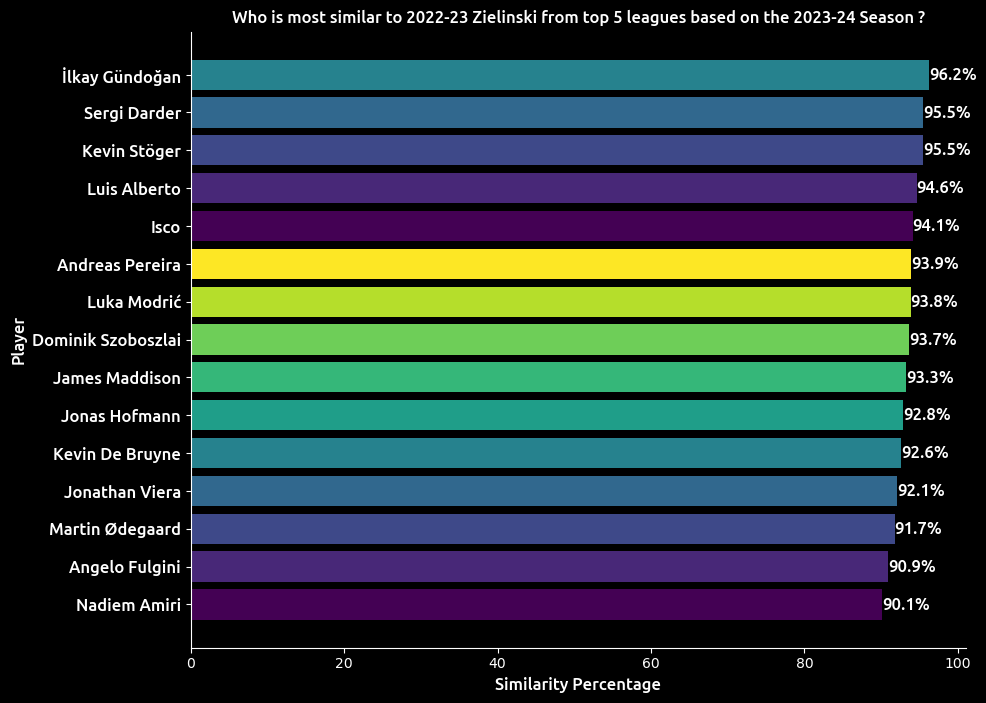

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_zielinski_2023 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_zielinski_2023', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_zielinski_2023'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to 2022-23 Zielinski from top 5 leagues based on the 2023-24 Season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2023.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [23]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and miMFielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['MF'])]
newbie = newbie[newbie['Pos'].isin(['MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)



In [24]:
Darder=player_2024[player_2024['Player']=='Sergi Darder']
Darder

Unnamed: 0        Player  Nation Pos     Squad        Comp  Age    Born  \
66         640  Sergi Darder  es ESP  MF  Mallorca  es La Liga  0.0  1993.0   

    MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
66  36      21  2157  24.0         0.08       0.29        0.08          0.29   

    xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
66      0.09          0.36        0.09            0.36                62.0   

    Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
66           34.0            54.8              21.0               33.9   

    Touches_per_90  Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  \
66           51.21                    0.42                    5.88   

    Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
66                   29.54                   17.04                    1.25   

    Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
66                      51.21                       2.58   

    Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
66                  1.42                     0.88           30.38   

    Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
66                 194.17                                97.96   

    Progressive_Carries_per_90  1/3_Carries_per_90  \
66                        2.33                2.12   

    Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
66                         0.17                 2.0                  1.0   

    Passes_Received_per_90  Progressive_Passes_Received_per_90  \
66                   32.96                                3.12   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  \
66                         3.8                     0.29   

    Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
66                   2.21                   1.21                  0.04   

    Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
66              0.12                     0.17                   0.04   

    Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
66                   0.12                   0.17                   0.0   

    Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
66               0.0                      0.0                    0.0   

    Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
66             725.0            1002.0               72.4         13785.0   

    Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
66          4827.0             313.0             357.0               87.7   

    Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  \
66              275.0              349.0                78.8            115.0   

    Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  \
66            229.0              50.2            0.21        0.27       0.21   

    A-xAG_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
66         -0.06               2.12                5.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
66                        1.33                         0.58   

    Progressive_Passes_per_90  Passes_Attempted_per_90  \
66                        5.5                    41.75   

    Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  \
66                    35.04                     6.25                     2.29   

    Through_Balls_per_90  Switches_per_90  Crosses_per_90  \
66                  0.42             0.79            6.21   

    Throw_Ins_Taken_per_90  Corner_Kicks_per_90  In_Corner_Kicks_per_90  \
66                    0.54                 2.62                    0.96   

    Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  Passes_Cmp_per_90  \
66                      1.5                     0.08              30.21   

  

In [25]:
import pandas as pd








params=['Goals_per90', 'Passes_1/3_per_90',  'Goal_Creating_Action_90',
        'xG_per90','Shots_on_target_per90', 'G+A_per90',
        'xA_per_90','1/3_Carries_per_90', 'Shot_Creating_Action_per90',
        'Passes_Penalty_Area_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90','Key_Passes_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
darder_percentile_ranks = round(players_percentile_ranks.iloc[[66]],0)

# Print the percentile ranks for Declan Rice
darder_percentile_ranks


Goals_per90  Passes_1/3_per_90  Goal_Creating_Action_90  xG_per90  \
66         58.0               91.0                     88.0      42.0   

    Shots_on_target_per90  G+A_per90  xA_per_90  1/3_Carries_per_90  \
66                   38.0       93.0       91.0                80.0   

    Shot_Creating_Action_per90  Passes_Penalty_Area_per_90  \
66                        86.0                        99.0   

    Progressive_Carries_per_90  Shot_Creating_Action_per90  \
66                        89.0                        86.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Key_Passes_per_90  
66                    85.0                    36.0               96.0

In [26]:
darder_percentile_ranks_list = darder_percentile_ranks.values.flatten().tolist()

darder_percentile_ranks_list

[58.0,
 91.0,
 88.0,
 42.0,
 38.0,
 93.0,
 91.0,
 80.0,
 86.0,
 99.0,
 89.0,
 86.0,
 85.0,
 36.0,
 96.0]

In [27]:
image_path = "Darder.jpg"
fdj_cropped = Image.open(image_path)


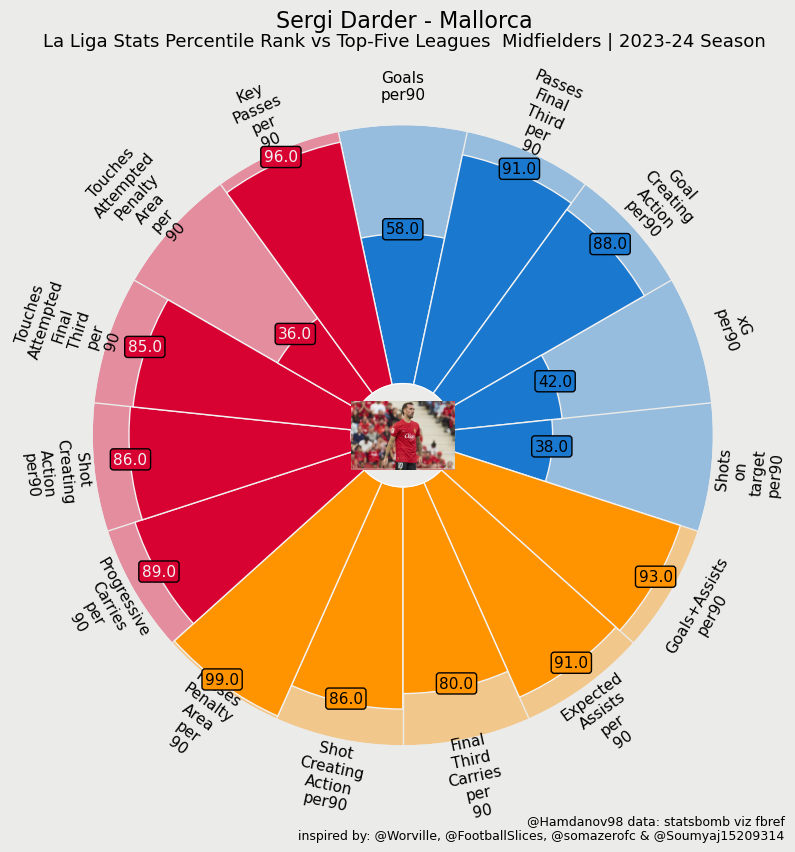

In [28]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    darder_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Sergi Darder - Mallorca", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues  Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Darder_2024_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png
